In [519]:
## Predicting credit card default

In [828]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [830]:
#Load Data

In [832]:
url = r'C:\Users\emman\OneDrive\Bureau\Data Analytics\Default of Credit Card Clients\default of credit card clients.csv'

df = pd.read_csv(url)

In [834]:
df.sample(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
14729,14729,110000,1,2,1,30,0,0,3,2,...,65413,66520,68270,9600,0,2600,2300,3000,5200,1
13215,13215,130000,2,3,1,35,0,0,0,-1,...,386,1770,384,2606,3174,386,1778,384,1446,0
16651,16651,230000,1,2,1,47,-1,-1,-1,-1,...,-1,999,0,1000,1000,0,1000,0,0,0
23139,23139,120000,2,1,2,34,0,0,0,-1,...,3095,0,2873,2000,5312,3095,0,2873,0,0
23202,23202,400000,2,2,1,34,-1,-1,-1,-1,...,15631,14417,12228,206032,21153,15948,10000,10000,22934,0
6022,6022,300000,2,3,1,39,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19353,19353,290000,2,2,1,49,-1,0,0,0,...,35058,36965,38863,3000,3500,2500,2500,2500,2000,0
10489,10489,200000,2,4,2,25,0,0,0,0,...,96918,98685,97621,4257,3274,3025,3266,3145,2176,0
20968,20968,150000,1,1,1,38,5,4,3,2,...,148309,143972,139650,0,0,0,5000,5000,0,1
15460,15460,200000,1,1,2,28,-1,2,2,-2,...,-2,-90,-90,0,27,88,0,0,0,0


In [836]:
## Data Inspection

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [840]:
## Missing value check

In [842]:
df.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [844]:
# Duplicate check

In [846]:
df.duplicated().sum()

0

In [848]:
#Column renaming for an easier reference

In [850]:
column_mapping = {
    'Unnamed':'ID',
    'X1': 'LIMIT_BAL',
    'X2': 'SEX',
    'X3': 'EDUCATION',
    'X4': 'MARRIAGE',
    'X5': 'AGE',
    'X6': 'PAY_0',
    'X7': 'PAY_2',
    'X8': 'PAY_3',
    'X9': 'PAY_4',
    'X10': 'PAY_5',
    'X11': 'PAY_6',
    'X12': 'BILL_AMT1',
    'X13': 'BILL_AMT2',
    'X14': 'BILL_AMT3',
    'X15': 'BILL_AMT4',
    'X16': 'BILL_AMT5',
    'X17': 'BILL_AMT6',
    'X18': 'PAY_AMT1',
    'X19': 'PAY_AMT2',
    'X20': 'PAY_AMT3',
    'X21': 'PAY_AMT4',
    'X22': 'PAY_AMT5',
    'X23': 'PAY_AMT6',
    'Y': 'default_payment_next_month'
}
df.rename(columns=column_mapping, inplace=True)

In [852]:
# Exploratory Data Analysis

In [854]:
#Univariate Analysis

In [856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  30001 non-null  object
 1   LIMIT_BAL                   30001 non-null  object
 2   SEX                         30001 non-null  object
 3   EDUCATION                   30001 non-null  object
 4   MARRIAGE                    30001 non-null  object
 5   AGE                         30001 non-null  object
 6   PAY_0                       30001 non-null  object
 7   PAY_2                       30001 non-null  object
 8   PAY_3                       30001 non-null  object
 9   PAY_4                       30001 non-null  object
 10  PAY_5                       30001 non-null  object
 11  PAY_6                       30001 non-null  object
 12  BILL_AMT1                   30001 non-null  object
 13  BILL_AMT2                   30001 non-null  ob

In [858]:
#The target variable will be 'default_payment_next_month

In [860]:
df["default_payment_next_month"].value_counts()

default_payment_next_month
0                             23364
1                              6636
default payment next month        1
Name: count, dtype: int64

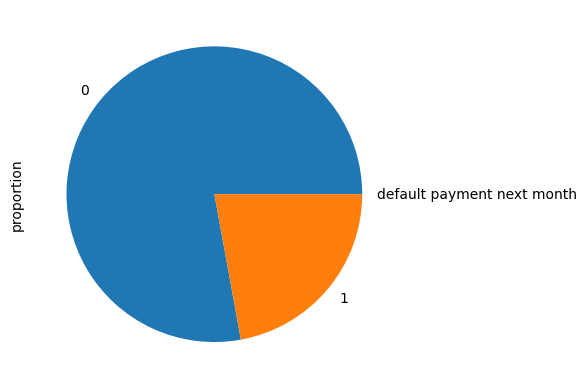

In [862]:
df["default_payment_next_month"].value_counts(normalize = True).plot(kind = "pie");

In [864]:
df.describe()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [866]:
# Bivariate Analysis

In [868]:
# I selected all columns exepct SEX, EDUCATION and MARRIAGE because those are categorical and would not make sens in a quantitative correlation map

selected_columns = df[[
    'LIMIT_BAL',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6', 
    'BILL_AMT1', 
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6', 
    'PAY_AMT1', 
    'PAY_AMT2', 
    'PAY_AMT3', 
    'PAY_AMT4', 
    'PAY_AMT5', 
    'PAY_AMT6', 
    'AGE', 
    'default_payment_next_month']]

In [870]:
selected_columns = selected_columns.apply(pd.to_numeric, errors='coerce')

In [872]:
corr = selected_columns.corr()

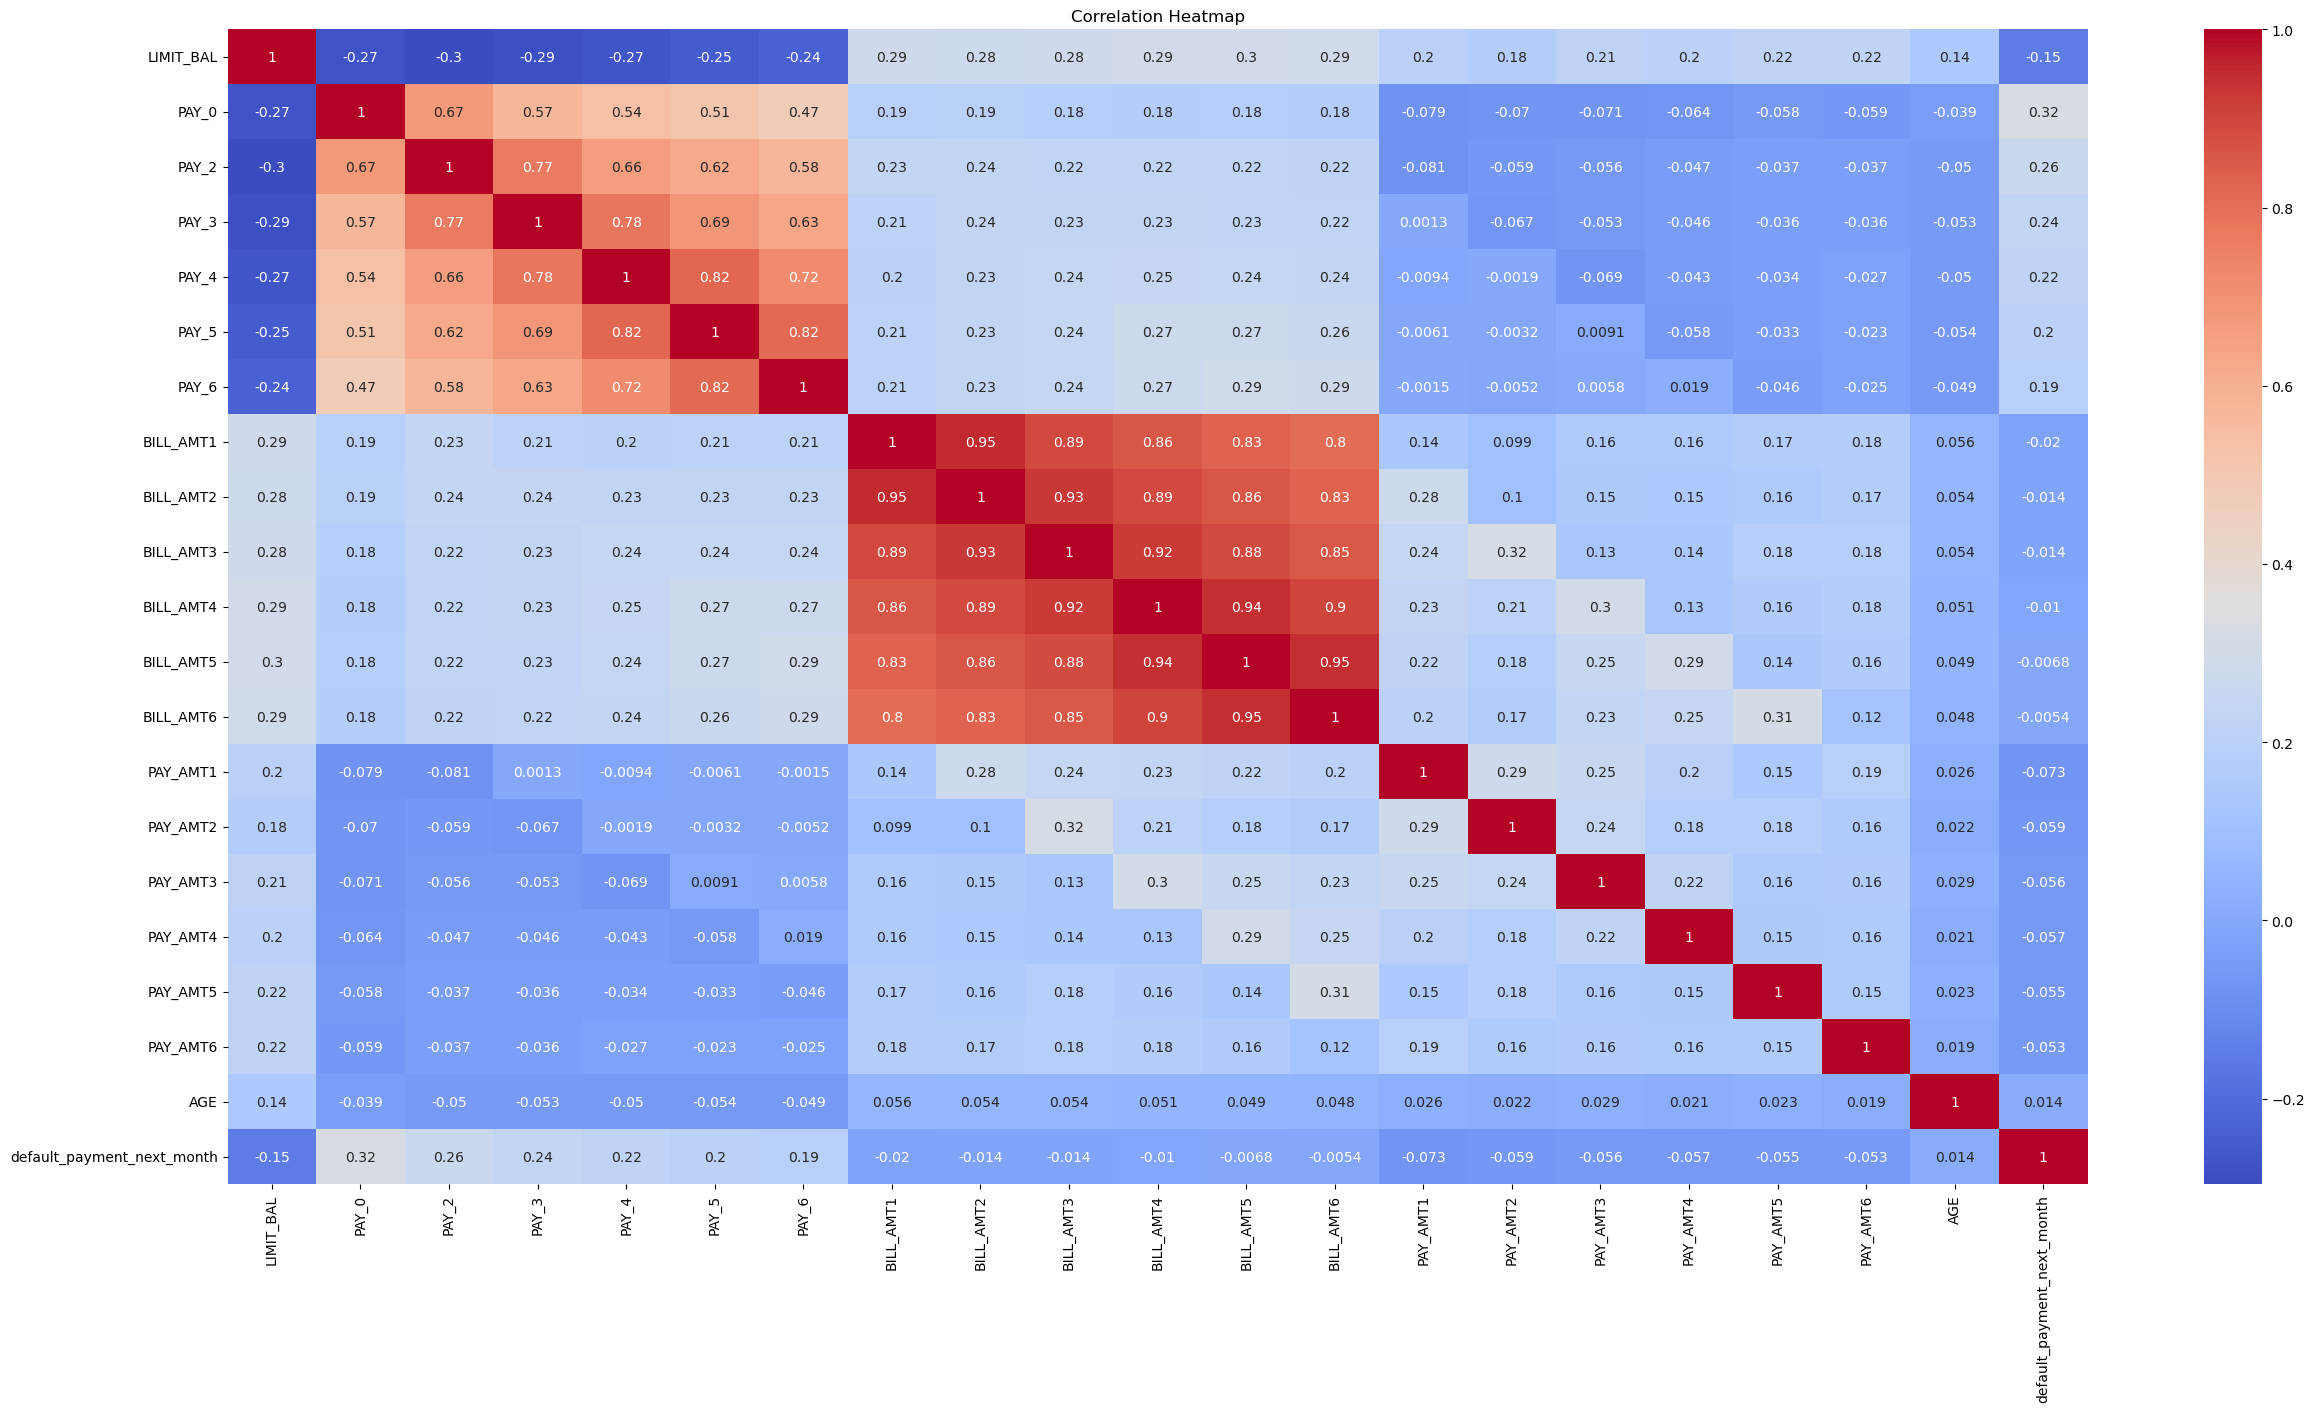

In [874]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [875]:
# Based on the above heatmap:
# (1) we can discount the idea that the age is correlated with default
# (2) LIMIT_BAL is negatively correlated with default -0.15
# (3) PAY_0 (being the history of repayment status as of September 2005) has the highest correlation with default with 0.32

In [878]:
# As SEX,EDUCATION and MARRIAGE are categorical values, we will each of them separately 

In [880]:
df['SEX'] = pd.to_numeric(df['SEX'], errors='coerce')
df['default_payment_next_month'] = pd.to_numeric(df['default_payment_next_month'], errors='coerce')

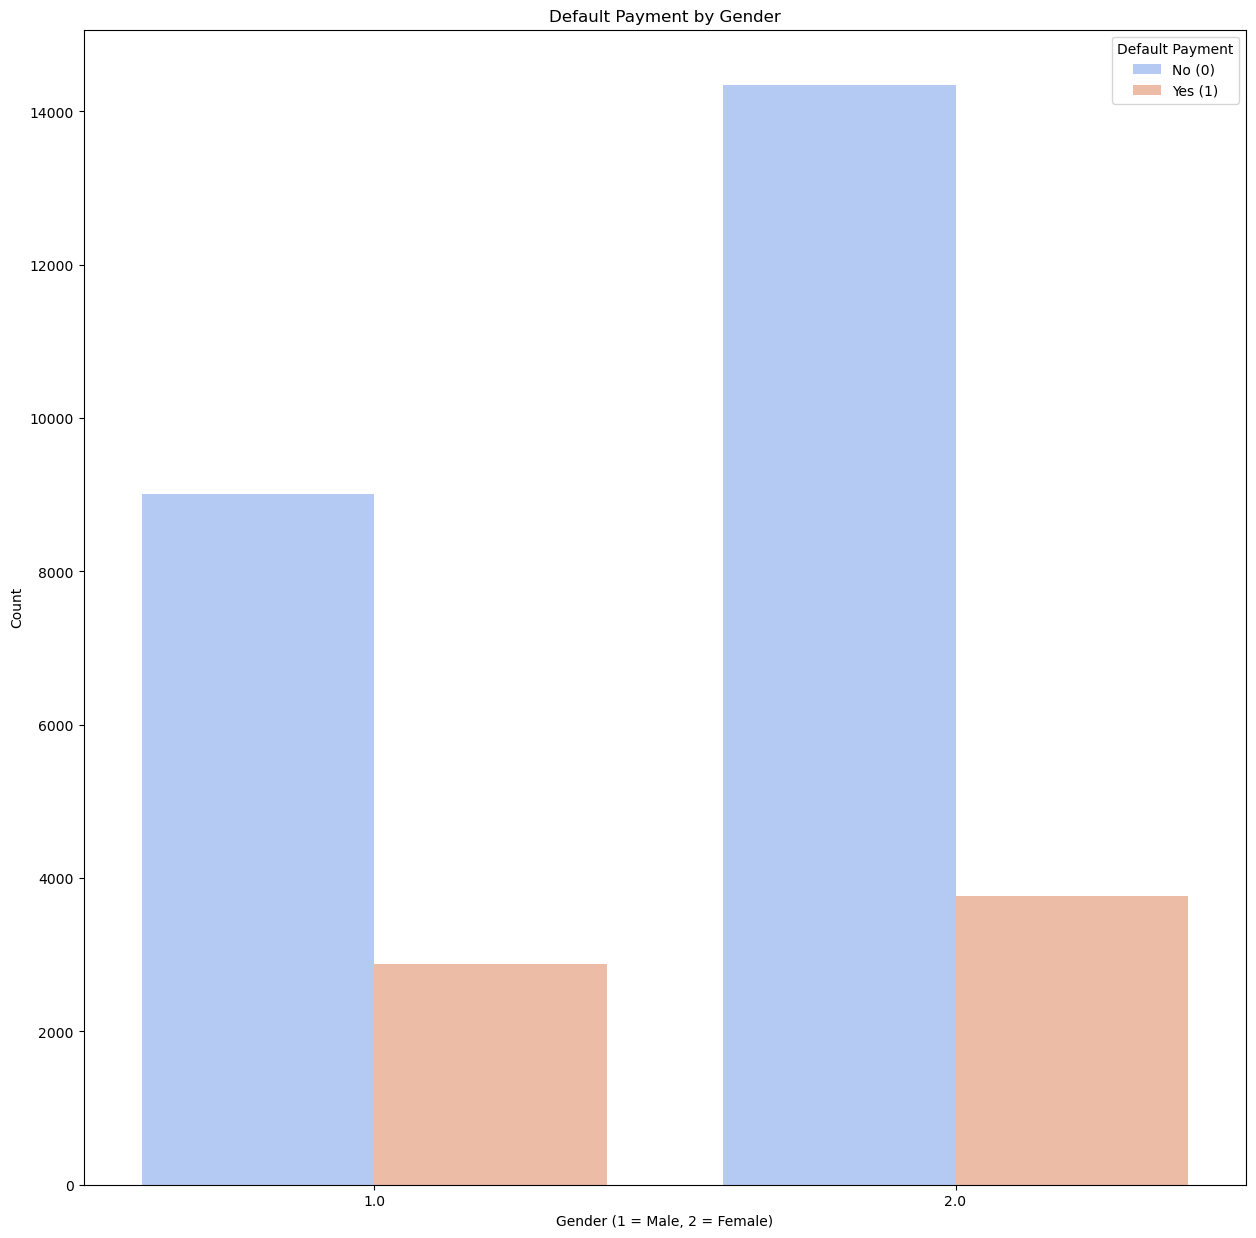

In [882]:
plt.figure(figsize=(15, 15))
sns.countplot(x='SEX', hue='default_payment_next_month', data=df, palette='coolwarm')
plt.title('Default Payment by Gender')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['No (0)', 'Yes (1)'])

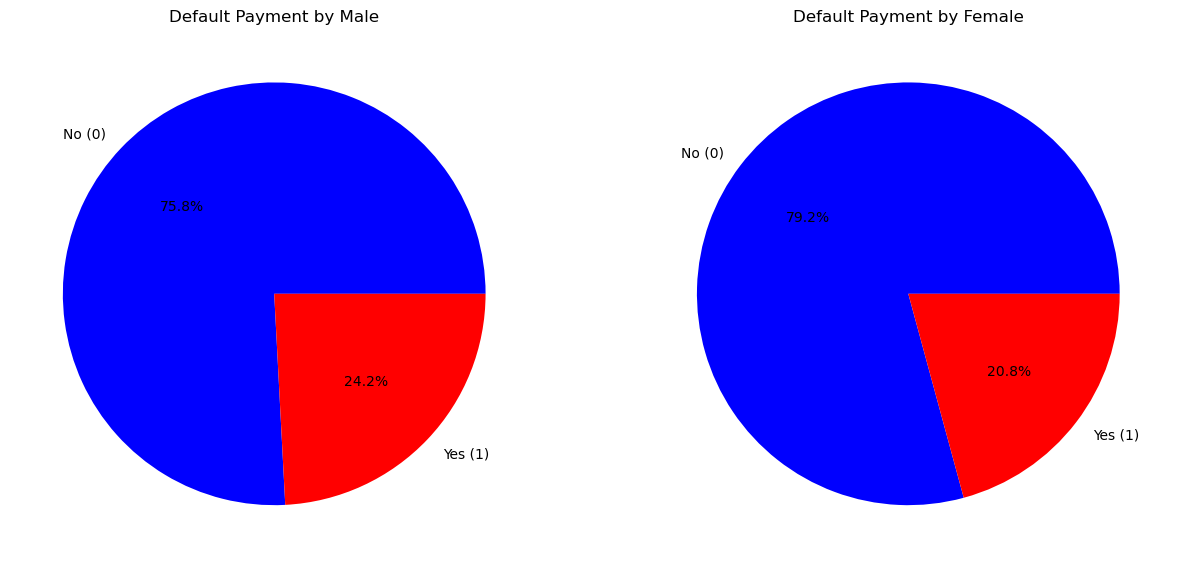

In [884]:
# The number of woman and men in the dataset is different, therefore we will use percentage instead of nominal values.
# Create a pie chart
# Groupping df by column SEX and default_payment_next_month
#size() function counts the number of occurences for each combination of SEX and default_payment_next_month
#unstack() function pivots the default_payment_next_month levels to columns, resulting in a dataframe where the rows represent sex and the columns represent default_payment_next_month
gender_default = df.groupby(['SEX', 'default_payment_next_month']).size().unstack()

#percentage of default for each gender.
#gender_default.sum(axis=1) calculates the sum of each value of a given gender.
#gender_default.div(....,axis=0) divides each element in gender_default by the corresponding row sum, resulting in the proportion of defaults for each gender.
gender_default_percentage = gender_default.div(gender_default.sum(axis=1), axis=0) * 100

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].pie(gender_default_percentage.loc[1], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[0].set_title('Default Payment by Male')
axes[1].pie(gender_default_percentage.loc[2], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[1].set_title('Default Payment by Female')
plt.show()

In [900]:
df['EDUCATION'] = pd.to_numeric(df['EDUCATION'], errors='coerce')
df['default_payment_next_month'] = pd.to_numeric(df['default_payment_next_month'], errors='coerce')

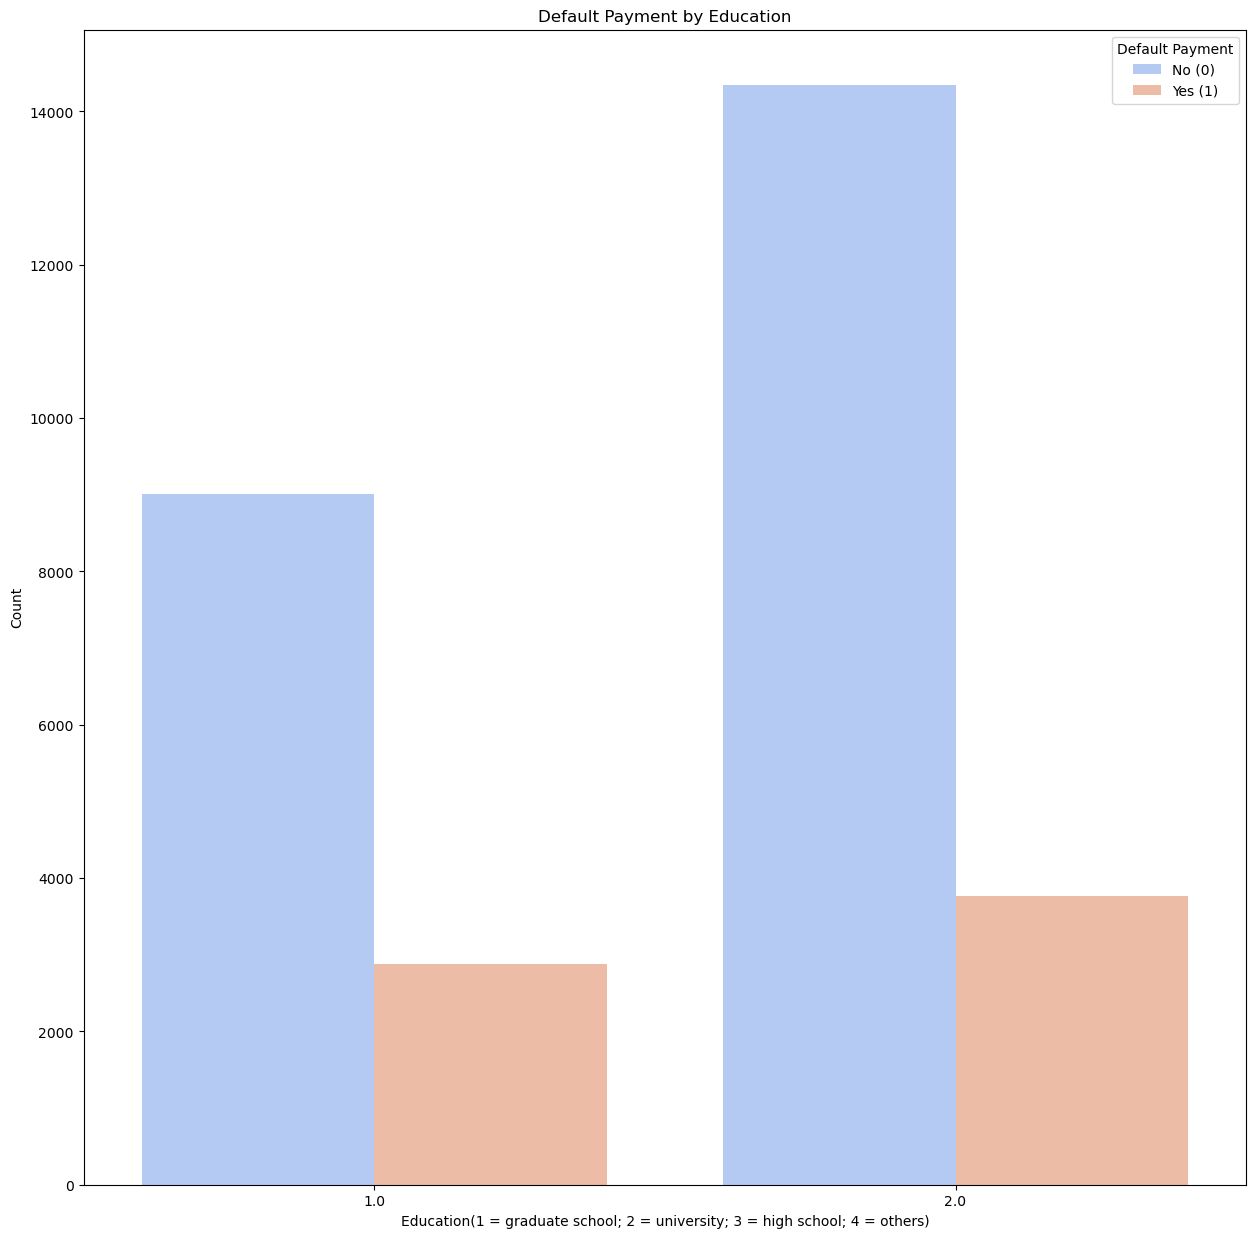

In [902]:
plt.figure(figsize=(15, 15))
sns.countplot(x='SEX', hue='default_payment_next_month', data=df, palette='coolwarm')
plt.title('Default Payment by Education')
plt.xlabel('Education(1 = graduate school; 2 = university; 3 = high school; 4 = others)')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['No (0)', 'Yes (1)'])

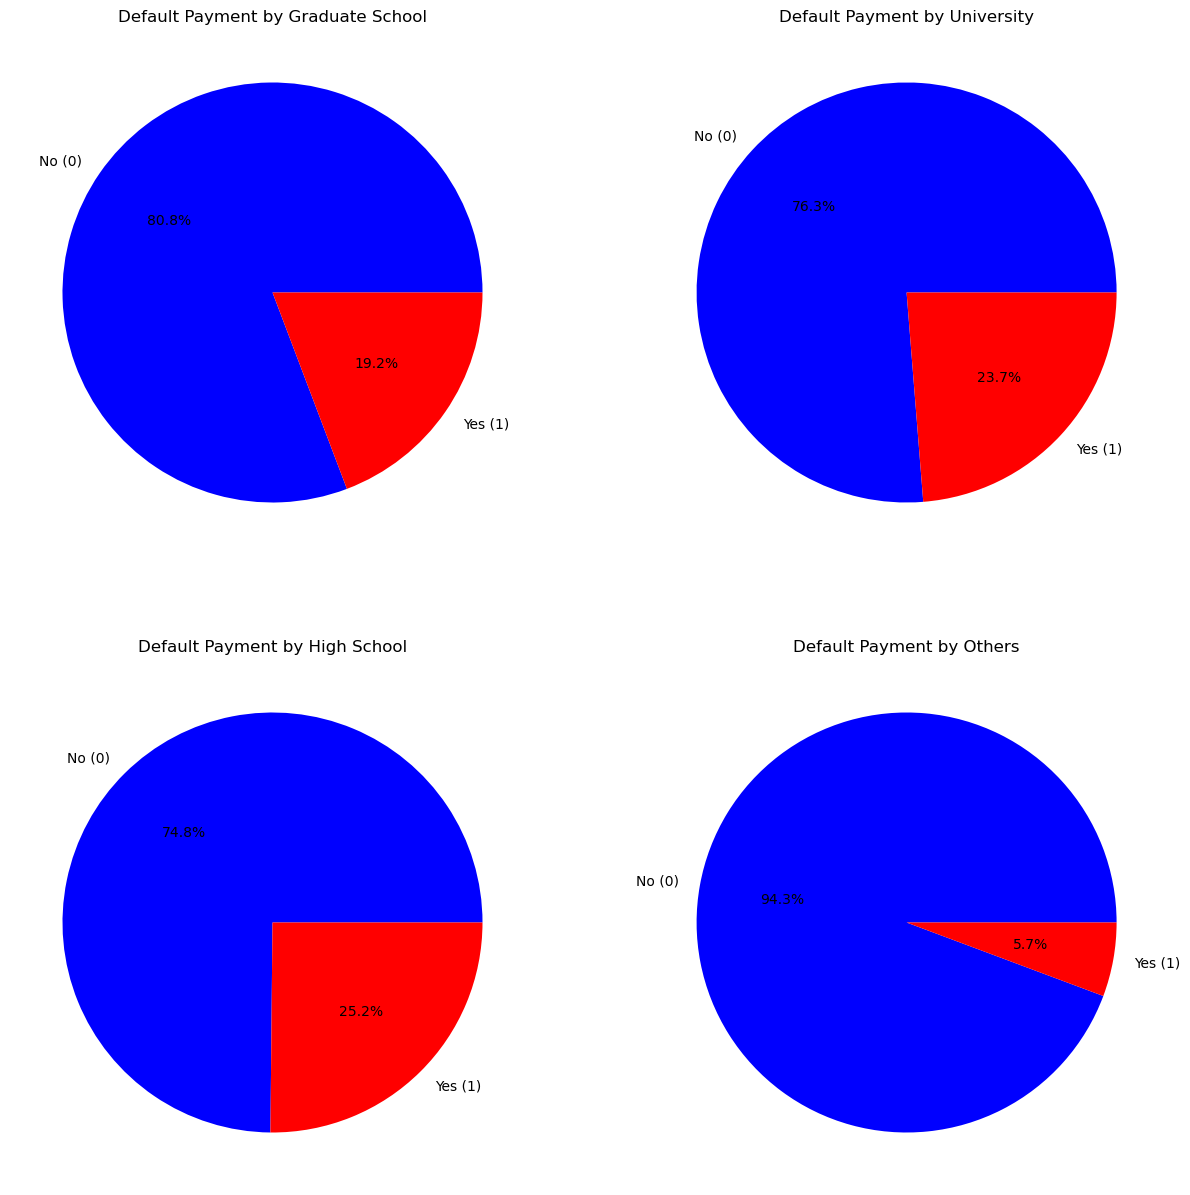

In [890]:
# Let's convert to percentage instead of nominal values.
# Create a pie chart
# Groupping df by column EDUCATION and default_payment_next_month
#size() function counts the number of occurences for each combination of EDUCATION and default_payment_next_month
#unstack() function pivots the default_payment_next_month levels to columns, resulting in a dataframe where the rows represent education and the columns represent default_payment_next_month
education_default = df.groupby(['EDUCATION', 'default_payment_next_month']).size().unstack()

#percentage of default for each education level.
#education_default.sum(axis=1) calculates the sum of each value of a given gender.
#education_default.div(....,axis=0) divides each element in gender_default by the corresponding row sum, resulting in the proportion of defaults for each education levels.
education_default_percentage = education_default.div(education_default.sum(axis=1), axis=0) * 100

# Plot pie charts
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes[0, 0].pie(education_default_percentage.loc[1], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[0, 0].set_title('Default Payment by Graduate School')
axes[0, 1].pie(education_default_percentage.loc[2], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[0, 1].set_title('Default Payment by University')
axes[1, 0].pie(education_default_percentage.loc[3], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[1, 0].set_title('Default Payment by High School')
axes[1, 1].pie(education_default_percentage.loc[4], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[1, 1].set_title('Default Payment by Others')
plt.show()

In [912]:
df['MARRIAGE'] = pd.to_numeric(df['MARRIAGE'], errors='coerce')
df['default_payment_next_month'] = pd.to_numeric(df['default_payment_next_month'], errors='coerce')

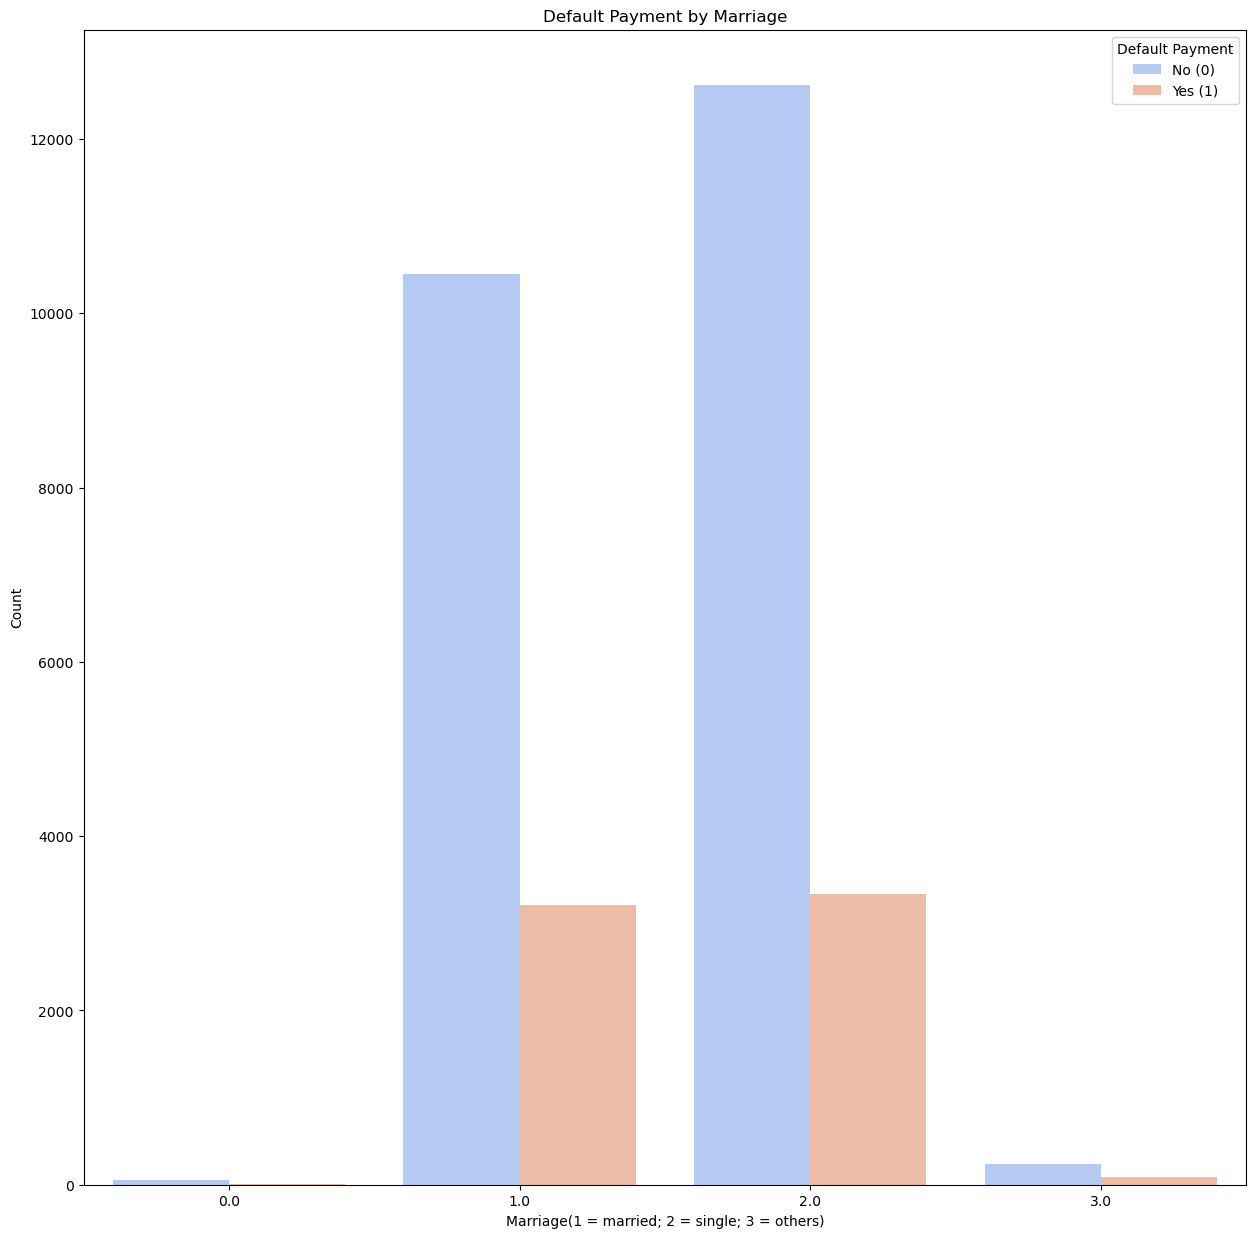

In [914]:
plt.figure(figsize=(15, 15))
sns.countplot(x='MARRIAGE', hue='default_payment_next_month', data=df, palette='coolwarm')
plt.title('Default Payment by Marriage')
plt.xlabel('Marriage(1 = married; 2 = single; 3 = others)')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['No (0)', 'Yes (1)'])

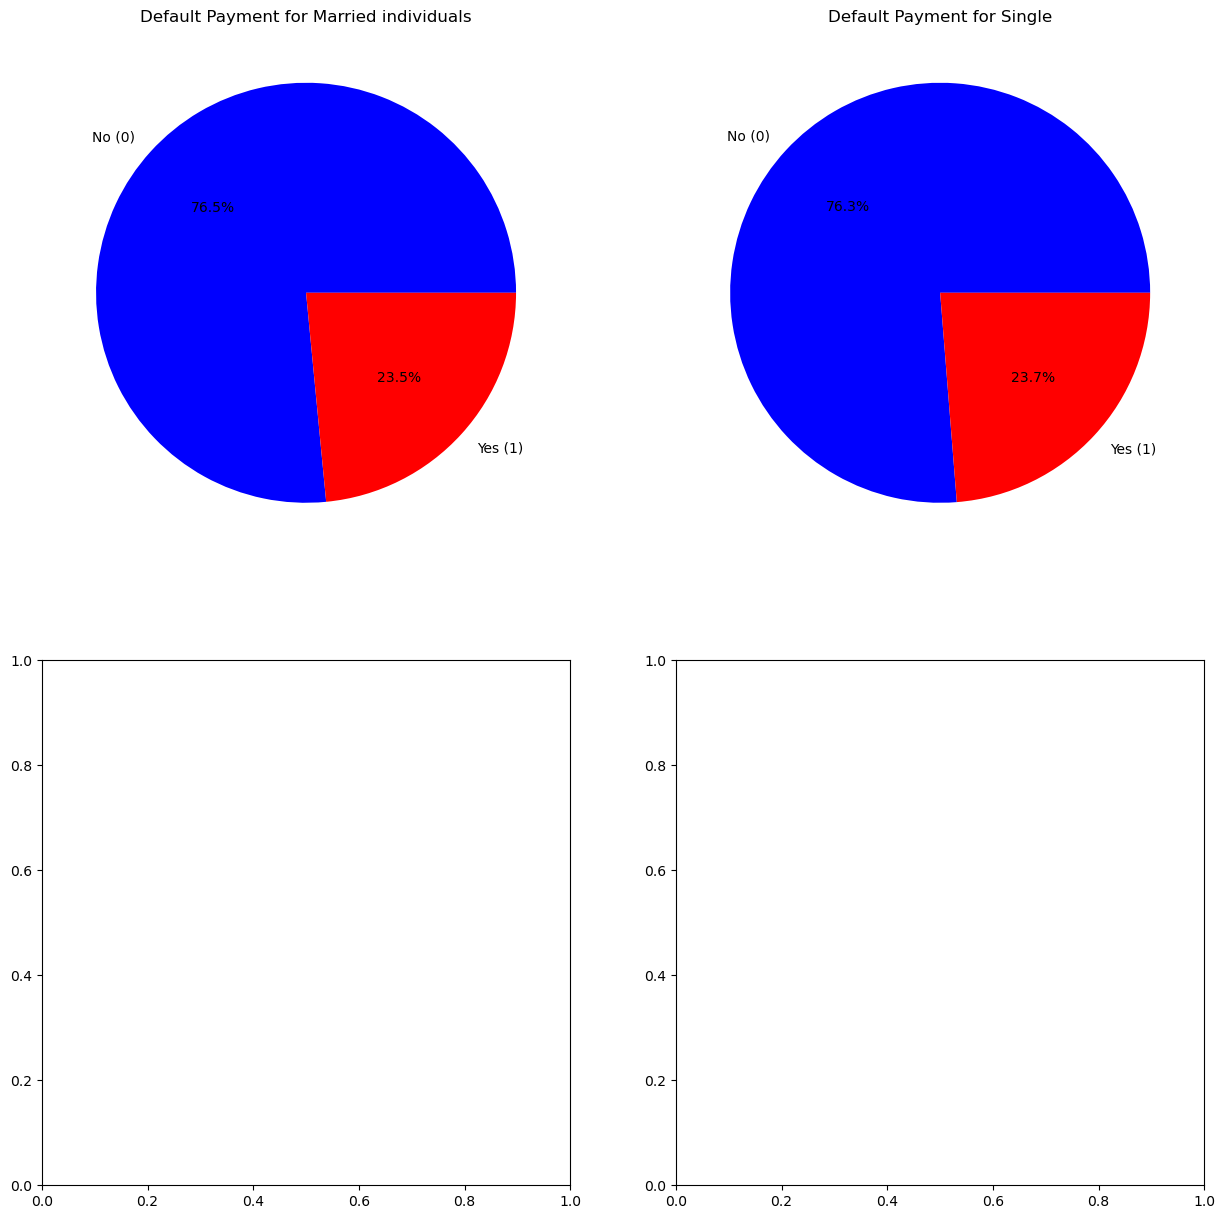

In [916]:
# Let's convert to percentage instead of nominal values.
# Create a pie chart
# Groupping df by column MARRIAGE and default_payment_next_month
#size() function counts the number of occurences for each combination of MARRIAGE and default_payment_next_month
#unstack() function pivots the default_payment_next_month levels to columns, resulting in a dataframe where the rows represent education and the columns represent default_payment_next_month
marriage_default = df.groupby(['MARRIAGE', 'default_payment_next_month']).size().unstack()

#percentage of default for each MARRIAGE status.
#marriage_default.sum(axis=1) calculates the sum of each value of a given marriage status.
#marriage_default.div(....,axis=0) divides each element in marriage_default by the corresponding row sum, resulting in the proportion of defaults for each marriage levels.
marriage_default_percentage = marriage_default.div(marriage_default.sum(axis=1), axis=0) * 100

# Plot pie charts
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes[0, 0].pie(marriage_default_percentage.loc[1], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[0, 0].set_title('Default Payment for Married individuals')
axes[0, 1].pie(education_default_percentage.loc[2], labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[0, 1].set_title('Default Payment for Single')
plt.show()

In [918]:
# Data Preparation for Modeling

#For Marriage and Sex OneHotEncoding
#For EDUCATION change to ordinal encoding

In [920]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [922]:
# OneHotEncoding for MARRIAGE and SEX
onehotencoder = OneHotEncoder()
marriage_sex_encoded = onehotencoder.fit_transform(df[['MARRIAGE', 'SEX']]).toarray()
marriage_sex_encoded_df = pd.DataFrame(marriage_sex_encoded, columns=onehotencoder.get_feature_names_out(['MARRIAGE', 'SEX']))
df = pd.concat([df, marriage_sex_encoded_df], axis=1).drop(['MARRIAGE', 'SEX'], axis=1)

In [936]:
# Drop the Unnamed column (mapped as ID)
df = df.drop(columns=['Unnamed: 0'])

#Missing values in EDUCATION
df['EDUCATION'] = df['EDUCATION'].fillna('unknown')

In [938]:
# Mapping string values to numerical values for EDUCATION
education_mapping = {
    'unknown': 0,
    'high school': 1,
    'college': 2,
    'university': 3,
    'graduate school': 4
}
df['EDUCATION'] = df['EDUCATION'].map(education_mapping)

In [940]:
# Ordinal encoding for EDUCATION
education_categories = [0, 1, 2, 3, 4]
ordinalencoder = OrdinalEncoder(categories=[education_categories])
df['EDUCATION'] = ordinalencoder.fit_transform(df[['EDUCATION']])

In [1009]:
#Convert LIMIT8BALL to float
print(df['LIMIT_BAL'].unique())

['LIMIT_BAL' '20000' '120000' '90000' '50000' '500000' '100000' '140000'
 '200000' '260000' '630000' '70000' '250000' '320000' '360000' '180000'
 '130000' '450000' '60000' '230000' '160000' '280000' '10000' '40000'
 '210000' '150000' '380000' '310000' '400000' '80000' '290000' '340000'
 '300000' '30000' '240000' '470000' '480000' '350000' '330000' '110000'
 '420000' '170000' '370000' '270000' '220000' '190000' '510000' '460000'
 '440000' '410000' '490000' '390000' '580000' '600000' '620000' '610000'
 '700000' '670000' '680000' '430000' '550000' '540000' '1000000' '530000'
 '710000' '560000' '520000' '750000' '640000' '16000' '570000' '590000'
 '660000' '720000' '327680' '740000' '800000' '760000' '690000' '650000'
 '780000' '730000']


In [1011]:
# Remove the header row from LIMIT_BAL column
df = df[df['LIMIT_BAL'] != 'LIMIT_BAL']

In [1013]:
# Convert LIMIT_BAL to float
df['LIMIT_BAL'] = df['LIMIT_BAL'].astype(float)

In [1017]:
print(df['LIMIT_BAL'].unique())

[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]


In [1019]:
# Display the first few rows(df.head()) of the updated dataframe
display(df.head())

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,default_payment_next_month,MARRIAGE_0.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0,MARRIAGE_nan,SEX_1.0,SEX_2.0,SEX_nan
1,20000.0,0.0,24,2,2,-1,-1,-2,-2,3913,...,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,120000.0,0.0,26,-1,2,0,0,0,2,2682,...,2000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,90000.0,0.0,34,0,0,0,0,0,0,29239,...,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,50000.0,0.0,37,0,0,0,0,0,0,46990,...,1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,50000.0,0.0,57,-1,0,-1,0,0,0,8617,...,679,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1021]:
#Train - Test split

In [1023]:
from sklearn.model_selection import train_test_split

In [1025]:
X = df.drop(columns='default_payment_next_month')
y = df['default_payment_next_month']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [1027]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\n")
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (24000, 29)
y_train: (24000,)


x_test: (6000, 29)
y_test: (6000,)


In [1029]:
display(x_train.head())
display(y_train.head())

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,MARRIAGE_0.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0,MARRIAGE_nan,SEX_1.0,SEX_2.0,SEX_nan
19283,230000.0,0.0,29,-1,-1,-1,-1,-1,-1,2624,...,2491,9785,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1714,390000.0,0.0,38,0,0,0,0,0,0,164418,...,6000,5000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15938,50000.0,0.0,26,1,2,2,2,2,3,18253,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
700,300000.0,0.0,31,0,0,0,0,2,-1,43610,...,561,500,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29599,70000.0,0.0,39,0,0,0,0,0,0,71059,...,8010,7000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


19283    0.0
1714     0.0
15938    0.0
700      0.0
29599    1.0
Name: default_payment_next_month, dtype: float64

In [1031]:
#Model building

In [1033]:
#Dummy Classifier

In [1035]:
from sklearn.dummy import DummyClassifier

In [1037]:
dummy = DummyClassifier()

In [1039]:
dummy.fit(x_train, y_train)

DummyClassifier()

In [1041]:
print("The accuracy score of the model for Train is {:.2f}".format(dummy.score(x_train, y_train)))

The accuracy score of the model for Train is 0.78


In [1043]:
print("The accuracy score of the model for Test is {:.2f}".format(dummy.score(x_test, y_test)))

The accuracy score of the model for Test is 0.78


In [1045]:
# K-Nearest Neighbor

In [1047]:
from sklearn.neighbors import KNeighborsClassifier

In [1049]:
knn = KNeighborsClassifier()

# fit the model 
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [1051]:
train_predictions = knn.predict(x_train)

In [1052]:
print("The accuracy score of the model for Train is {:.2f}".format(knn.score(x_train, y_train)))

The accuracy score of the model for Train is 0.82


In [1054]:
print("The accuracy score of the model for test is {:.2f}".format(knn.score(x_test, y_test)))

The accuracy score of the model for test is 0.75


In [1057]:
#Decision Tree

In [1059]:
from sklearn.tree import DecisionTreeClassifier

In [1061]:
dt = DecisionTreeClassifier()

# fit the model 
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [1062]:
print("The accuracy score of the model for Train is {:.2f}".format(dt.score(x_train, y_train)))

The accuracy score of the model for Train is 1.00


In [1065]:
print("The accuracy score of the model for test is {:.2f}".format(dt.score(x_test, y_test)))

The accuracy score of the model for test is 0.72


In [1067]:
#RandomForest

In [1069]:
from sklearn.ensemble import RandomForestClassifier

In [1071]:
rf = RandomForestClassifier()

# fit the model 
rf.fit(x_train, y_train)

RandomForestClassifier()

In [1072]:
print("The accuracy score of the model for Train is {:.2f}".format(rf.score(x_train, y_train)))

The accuracy score of the model for Train is 1.00


In [1073]:
print("The accuracy score of the model for test is {:.2f}".format(rf.score(x_test, y_test)))

The accuracy score of the model for test is 0.82


In [ ]:
#RandomForest appears to have the best results
#Its train accuracy is 1.00 which is above every other models including the dummy Classifier
#ITs test accuracy is 0.82 which is above every other models includinng the dummy Classifier

In [1087]:
#Define the parameters for GridSearchCV:
params = {'n_estimators': [10, 50, 100], 'max_depth': [1, 2, 3, None]}

In [1089]:
#Create the RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [1091]:
#Perform GridSearchCV:

In [1095]:
from sklearn.model_selection import GridSearchCV

In [1099]:
grid = GridSearchCV(rf, param_grid=params, cv=5) 
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, None],
                         'n_estimators': [10, 50, 100]})

In [1103]:
results_df = pd.DataFrame(grid.cv_results_)

In [1105]:
#Print the best parameters and best score:
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters found:  {'max_depth': None, 'n_estimators': 50}
Best cross-validation score: 0.82


In [1107]:
#Fit the model with the best parameters:
best_rf = grid.best_estimator_
best_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [1109]:
#Evaluate the model:
print("Train accuracy: {:.2f}".format(best_rf.score(x_train, y_train)))
print("Test accuracy: {:.2f}".format(best_rf.score(x_test, y_test)))

Train accuracy: 1.00
Test accuracy: 0.82


In [1111]:
#Hyperparameter tuning did not improve the model.